# Prevalencia

Vamos a analizar el influjo de la prevalencia, en el devenir de la enfermedad

<div class="alert alert-block alert-info">
En epidemiología, se denomina <strong>prevalencia</strong> a la proporción de individuos de un grupo o una población (en medicina, persona), que presentan una característica o evento determinado (en medicina, enfermedades).    
</div>

Se define <strong>R0</strong>, como el nº de personas que infecta cada persona, en cada ciclo de infección.

Vamos a generar una lista de tablasy gráficas para ver la evolución del nº de infectados, al variar la prevalencia, y el R0.


In [1]:
import numpy as np
import pandas as pd 
import time
from datetime import datetime, date, time, timedelta

SITUACION_INICIAL = 1
prevalencia = 0 
R0 = 5.7


In [2]:


def Calcular_Cuadro_Prevalencias(R0,GENERACIONES,ARRAY_PREVALENCIAS):
    SITUACION_INICIAL=1
    def Get_Header(GENERACIONES,df):
        array_fechas = []
        FECHA_INICIAL_STR = '2020-02-01'
        FECHA_INICIAL = datetime.strptime(FECHA_INICIAL_STR, "%Y-%m-%d")
        modified_date = FECHA_INICIAL
        NUM_GENERACIONES = range(1,GENERACIONES)
        for generacion in NUM_GENERACIONES:
            modified_date += timedelta(days=7)
            array_fechas.append(datetime.strftime(modified_date, "%Y-%m-%d"))
        df.columns = array_fechas
        return df
    diccionario_prevalencias = {}
    array=[]

    for prevalencia in ARRAY_PREVALENCIAS : 
        infectados_en_esta_generacion = SITUACION_INICIAL
        NUM_GENERACIONES = range(1,GENERACIONES)
        array=[]
        for generacion in NUM_GENERACIONES:
            infectados_en_esta_generacion = infectados_en_esta_generacion * R0 * (1-prevalencia)
            array.append(infectados_en_esta_generacion)
            diccionario_prevalencias['prevalencia ' + str(prevalencia)[0:4] + ' y R0 ' + str(R0)] = array
    df = pd.DataFrame.from_dict(diccionario_prevalencias,'index')    
    df = Get_Header(GENERACIONES,df)
    return df.T

In [3]:
GENERACIONES=8
ARRAY_PREVALENCIAS = np.linspace(0,0.70,8)
ARRAY_PREVALENCIAS
df =  Calcular_Cuadro_Prevalencias(R0=R0,GENERACIONES=GENERACIONES,ARRAY_PREVALENCIAS=ARRAY_PREVALENCIAS)
df

,prevalencia 0.0 y R0 5.7,prevalencia 0.09 y R0 5.7,prevalencia 0.19 y R0 5.7,prevalencia 0.3 y R0 5.7,prevalencia 0.39 y R0 5.7,prevalencia 0.49 y R0 5.7,prevalencia 0.6 y R0 5.7,prevalencia 0.7 y R0 5.7
2020-02-08,5.700000,5.130000,4.560000,3.990000,3.420000,2.850000,2.280000,1.710000
2020-02-15,32.490000,26.316900,20.793600,15.920100,11.696400,8.122500,5.198400,2.924100
2020-02-22,185.193000,135.005697,94.818816,63.521199,40.001688,23.149125,11.852352,5.000211
2020-02-29,1055.600100,692.579226,432.373801,253.449584,136.805773,65.975006,27.023363,8.550361
2020-03-07,6016.920570,3552.931427,1971.624532,1011.263840,467.875744,188.028768,61.613267,14.621117
2020-03-14,34296.447249,18226.538222,8990.607868,4034.942722,1600.135043,535.881988,140.478248,25.002110
2020-03-21,195489.749319,93502.141081,40997.171876,16099.421462,5472.461847,1527.263667,320.290405,42.753608


In [4]:
   
from matplotlib import pyplot as plt    
import pandas as pd
import numpy as np

def Get_Chart(df,R0 ):
    fig = plt.figure(figsize=(8, 6), dpi=80)
    for ca in df.columns:
        plt.plot(df[ca])
        plt.legend(df.columns)
        fig.suptitle('Numero de infecciones por semana, con R0 = ' + str(R0), fontsize=20)
    return plt

#plt = Get_Chart(df,R0)


,prevalencia 0.0 y R0 2.7,prevalencia 0.09 y R0 2.7,prevalencia 0.19 y R0 2.7,prevalencia 0.3 y R0 2.7,prevalencia 0.39 y R0 2.7,prevalencia 0.49 y R0 2.7,prevalencia 0.6 y R0 2.7,prevalencia 0.7 y R0 2.7
2020-02-08,2.700000,2.430000,2.160000,1.890000,1.620000,1.350000,1.080000,0.810000
2020-02-15,7.290000,5.904900,4.665600,3.572100,2.624400,1.822500,1.166400,0.656100
2020-02-22,19.683000,14.348907,10.077696,6.751269,4.251528,2.460375,1.259712,0.531441
2020-02-29,53.144100,34.867844,21.767823,12.759898,6.887475,3.321506,1.360489,0.430467
2020-03-07,143.489070,84.728861,47.018498,24.116208,11.157710,4.484033,1.469328,0.348678
2020-03-14,387.420489,205.891132,101.559957,45.579633,18.075490,6.053445,1.586874,0.282430
2020-03-21,1046.035320,500.315451,219.369506,86.145507,29.282294,8.172151,1.713824,0.228768


,prevalencia 0.0 y R0 3.7,prevalencia 0.09 y R0 3.7,prevalencia 0.19 y R0 3.7,prevalencia 0.3 y R0 3.7,prevalencia 0.39 y R0 3.7,prevalencia 0.49 y R0 3.7,prevalencia 0.6 y R0 3.7,prevalencia 0.7 y R0 3.7
2020-02-08,3.700000,3.330000,2.960000,2.590000,2.220000,1.850000,1.480000,1.110000
2020-02-15,13.690000,11.088900,8.761600,6.708100,4.928400,3.422500,2.190400,1.232100
2020-02-22,50.653000,36.926037,25.934336,17.373979,10.941048,6.331625,3.241792,1.367631
2020-02-29,187.416100,122.963703,76.765635,44.998606,24.289127,11.713506,4.797852,1.518070
2020-03-07,693.439570,409.469132,227.226278,116.546389,53.921861,21.669987,7.100821,1.685058
2020-03-14,2565.726409,1363.532209,672.589784,301.855146,119.706531,40.089475,10.509215,1.870415
2020-03-21,9493.187713,4540.562254,1990.865760,781.804829,265.748500,74.165529,15.553639,2.076160


,prevalencia 0.0 y R0 4.7,prevalencia 0.09 y R0 4.7,prevalencia 0.19 y R0 4.7,prevalencia 0.3 y R0 4.7,prevalencia 0.39 y R0 4.7,prevalencia 0.49 y R0 4.7,prevalencia 0.6 y R0 4.7,prevalencia 0.7 y R0 4.7
2020-02-08,4.700000,4.230000,3.760000,3.290000,2.820000,2.350000,1.880000,1.410000
2020-02-15,22.090000,17.892900,14.137600,10.824100,7.952400,5.522500,3.534400,1.988100
2020-02-22,103.823000,75.686967,53.157376,35.611289,22.425768,12.977875,6.644672,2.803221
2020-02-29,487.968100,320.155870,199.871734,117.161141,63.240666,30.498006,12.491983,3.952542
2020-03-07,2293.450070,1354.259332,751.517719,385.460153,178.338677,71.670315,23.484929,5.573084
2020-03-14,10779.215329,5728.516974,2825.706623,1268.163904,502.915070,168.425240,44.151666,7.858048
2020-03-21,50662.312046,24231.626799,10624.656903,4172.259245,1418.220498,395.799313,83.005132,11.079848


,prevalencia 0.0 y R0 5.7,prevalencia 0.09 y R0 5.7,prevalencia 0.19 y R0 5.7,prevalencia 0.3 y R0 5.7,prevalencia 0.39 y R0 5.7,prevalencia 0.49 y R0 5.7,prevalencia 0.6 y R0 5.7,prevalencia 0.7 y R0 5.7
2020-02-08,5.700000,5.130000,4.560000,3.990000,3.420000,2.850000,2.280000,1.710000
2020-02-15,32.490000,26.316900,20.793600,15.920100,11.696400,8.122500,5.198400,2.924100
2020-02-22,185.193000,135.005697,94.818816,63.521199,40.001688,23.149125,11.852352,5.000211
2020-02-29,1055.600100,692.579226,432.373801,253.449584,136.805773,65.975006,27.023363,8.550361
2020-03-07,6016.920570,3552.931427,1971.624532,1011.263840,467.875744,188.028768,61.613267,14.621117
2020-03-14,34296.447249,18226.538222,8990.607868,4034.942722,1600.135043,535.881988,140.478248,25.002110
2020-03-21,195489.749319,93502.141081,40997.171876,16099.421462,5472.461847,1527.263667,320.290405,42.753608


,prevalencia 0.0 y R0 6.7,prevalencia 0.09 y R0 6.7,prevalencia 0.19 y R0 6.7,prevalencia 0.3 y R0 6.7,prevalencia 0.39 y R0 6.7,prevalencia 0.49 y R0 6.7,prevalencia 0.6 y R0 6.7,prevalencia 0.7 y R0 6.7
2020-02-08,6.700000,6.030000,5.360000,4.690000,4.020000,3.350000,2.680000,2.010000
2020-02-15,44.890000,36.360900,28.729600,21.996100,16.160400,11.222500,7.182400,4.040100
2020-02-22,300.763000,219.256227,153.990656,103.161709,64.964808,37.595375,19.248832,8.120601
2020-02-29,2015.112100,1322.115049,825.389916,483.828415,261.158528,125.944506,51.586870,16.322408
2020-03-07,13501.251070,7972.353744,4424.089951,2269.155267,1049.857283,421.914096,138.252811,32.808040
2020-03-14,90458.382169,48073.293078,23713.122135,10642.338204,4220.426278,1413.412221,370.517533,65.944161
2020-03-21,606071.160532,289881.957262,127102.334645,49912.566176,16966.113639,4734.930942,992.986989,132.547763


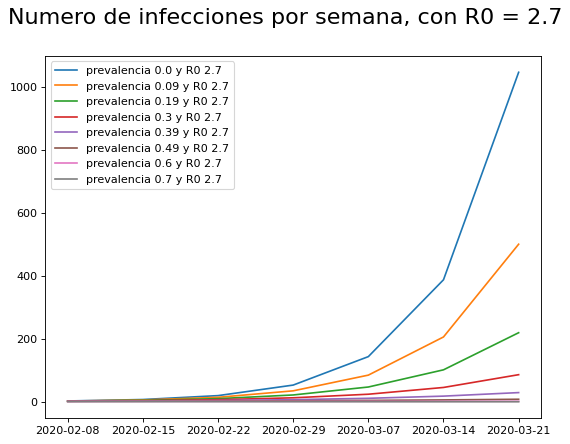

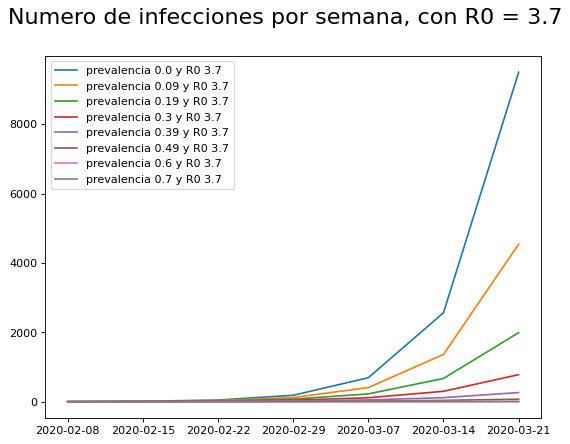

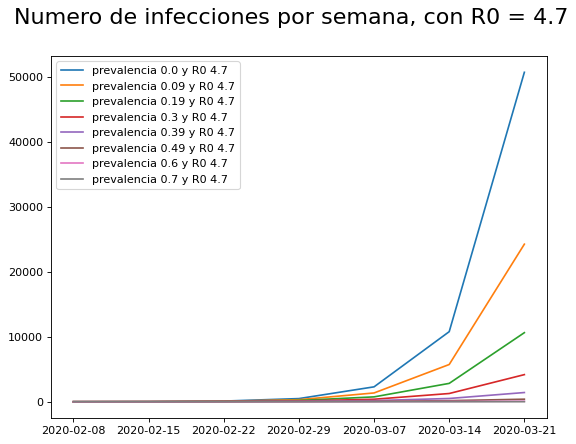

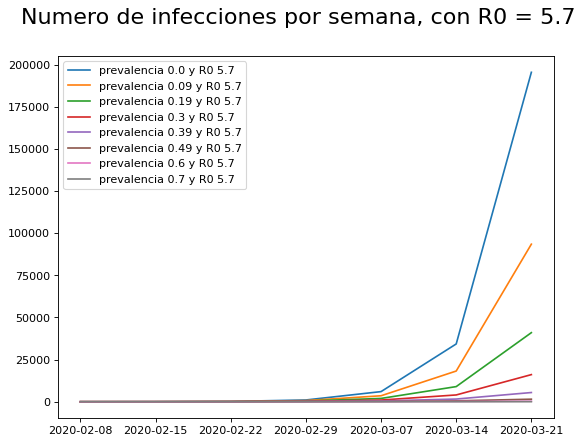

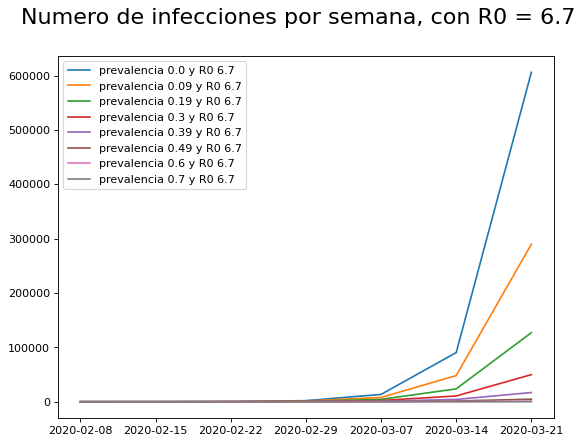

In [5]:
from IPython.display import display, HTML

ARRAY_R0S = [2.7,
             3.7 ,
             4.7,
             5.7,
             6.7 ]

for R0 in ARRAY_R0S : 
    
    df =  Calcular_Cuadro_Prevalencias(R0=R0,GENERACIONES=GENERACIONES,ARRAY_PREVALENCIAS=ARRAY_PREVALENCIAS)
    display(HTML (df.to_html()))
    plt = Get_Chart(df,R0)



TODO: 
    - Hacer gráfico de la evolución del nº de infectados, en el confinamiento (R0<1)
    

# Conclusiones:

- Para un R0 estimado de 5.7 del COVID-19, hace falta un <strong>70% de prevalencia</strong>, para que no haya brotes masivos.


- Las <strong>medidas de distanciamiento social</strong>, influyen para mantener bajo el R0, el cual influye mucho en el número de infectados.

    
- Con <strong>prevalencia bajas</strong>, aunque no haya inmunidad de grupo, el <strong>nº de infectados desciende significativamente</strong>. (En España, que los estudios sugieren una prevalencia menor del 10%, podría haber 1/3 ó 1/2 muertos)


- Mas <strong>importante</strong> aún que la prevalencia, es <strong>detectar los brotes lo mas pronto posible</strong>, y reducir el R0 mediante la búsqueda de contactos del infectado si el brote es pequeño, y mediante <strong>confinamientos parciales intermitentes</strong> , si no es posible mantener bajo el nº de infectados.

